In [1]:
import requests
import json



import matplotlib.pyplot as plt
import seaborn as sns

from pandasdmx import Request
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import pandas as pd
import numpy as np
import geopandas as gpd

import time

import csv

import sys, os
from sqlalchemy import create_engine

import pymssql
import sqlalchemy as db

from functools import reduce

import folium # map rendering library
from sklearn.neighbors import NearestNeighbors



/home/holborn/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Filtering by text using regex

In [ ]:
from pandas import DataFrame

df_with_venues = DataFrame(
    {
        "Venue Category": [
            "Speakeasy",
            "Boutique",
            "Peruvian Restaurant",
            "Bakery",
            "Vietnamese Restaurant",
            "Asian Restaurant",
            "Hotel",
            "Whisky Bar",
            "Street Art",
            "Italian Restaurant",
            "Bookstore",
            "French Restaurant",
            "Café",
            "Sushi Restaurant",
            "Australian Restaurant",
            "Indian Restaurant",
            "Coffee Shop",
            "Bar",
            "Wine Bar",
            "Theater",
            "BBQ Joint",
            "Burger Joint",
        ]
    }
)

regex_filter_venues = df_with_venues[df_with_venues["Venue Category"].str.match(r".*Restaurant")]

In [30]:
schoollocations2020 = pd.read_csv('schools_list.csv')

In [3]:
schoollocations2020.columns

Index(['Education_Sector', 'Entity_Type', 'School_No', 'School_Name',
       'School_Type', 'School_Status', 'Address_Line_1', 'Address_Line_2',
       'Address_Town', 'Address_State', 'Address_Postcode',
       'Postal_Address_Line_1', 'Postal_Address_Line_2', 'Postal_Town',
       'Postal_State', 'Postal_Postcode', 'Full_Phone_No', 'LGA_ID',
       'LGA_Name', 'X', 'Y'],
      dtype='object')

In [31]:
prop_data_set = pd.read_csv('venue_clusters.csv')

In [7]:
prop_data_set.head()

,price_lower,price,address_street_full,lat,lon,property_type,block_size,suburb,postcode,status,...,#2,#3,#4,#5,#6,#7,#8,#9,#10,Ancestry Cluster
0,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
1,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
2,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
3,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
4,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0


In [8]:
school_details = schoollocations2020[['Education_Sector', 'School_Name',
       'School_Type','Address_Town', 'Address_State', 'Address_Postcode',
  'LGA_ID',
       'LGA_Name', 'X', 'Y']].rename(columns={'X':'LONGITUDE','Y':'LATITUDE'})
school_details.head()

,Education_Sector,School_Name,School_Type,Address_Town,Address_State,Address_Postcode,LGA_ID,LGA_Name,LONGITUDE,LATITUDE
0,Government,Alberton Primary School,Primary,Alberton,VIC,3971,681,Wellington (S),-38.61771,146.66660
1,Government,Allansford and District Primary School,Primary,Allansford,VIC,3277,673,Warrnambool (C),-38.38628,142.59039
2,Government,Avoca Primary School,Primary,Avoca,VIC,3467,599,Pyrenees (S),-37.08450,143.47565
3,Government,Avenel Primary School,Primary,Avenel,VIC,3664,643,Strathbogie (S),-36.90137,145.23472
4,Government,Warrandyte Primary School,Primary,Warrandyte,VIC,3113,421,Manningham (C),-37.74268,145.21398


In [4]:
schoollocations2020[[ 'Address_Postcode','Education_Sector', 'School_Name',
       'School_Type','Address_Town', 'Address_State']]

,Address_Postcode,Education_Sector,School_Name,School_Type,Address_Town,Address_State
0,3971,Government,Alberton Primary School,Primary,Alberton,VIC
1,3277,Government,Allansford and District Primary School,Primary,Allansford,VIC
2,3467,Government,Avoca Primary School,Primary,Avoca,VIC
3,3664,Government,Avenel Primary School,Primary,Avenel,VIC
4,3113,Government,Warrandyte Primary School,Primary,Warrandyte,VIC
...,...,...,...,...,...,...
2258,3169,Independent,Fitra Community School,Primary,CLAYTON SOUTH,VIC
2259,3977,Independent,Clyde Grammar,Primary,CRANBOURNE EAST,VIC
2260,3217,Catholic,St Catherine of Siena Catholic Primary School,Primary,ARMSTRONG CREEK,VIC
2261,3992,Independent,Village High School,Secondary,RYANSTON,VIC


In [10]:
highschool_school=school_details[school_details.School_Type == "Secondary"]

In [11]:
highschool_count = highschool_school.groupby(['Address_Postcode','Education_Sector'])['School_Name'].count().unstack()
highschool_count

Education_Sector,Catholic,Government,Independent
Address_Postcode,,,
3000,NaN,NaN,3.0
3003,1.0,NaN,NaN
3004,NaN,1.0,NaN
3006,NaN,1.0,NaN
3011,NaN,1.0,NaN
...,...,...,...
3977,NaN,4.0,NaN
3978,1.0,NaN,NaN
3981,NaN,1.0,NaN


In [12]:
primary_school=school_details[school_details.School_Type == "Primary"]

In [23]:
#.rename(columns={'School_Name':'Primary_School'})

In [35]:
distance_measured = [highschool_count,primaryschool_count]

frames = [df.reset_index() for df in distance_measured] #reset the indexes and add dfs into a list
school_data_set = reduce(lambda left,right: pd.merge(left,right,on='Address_Postcode'), frames)
school_data_set = school_data_set.rename(columns={'School_Name':'Primary_School','Address_Postcode':'postcode'})
school_data_set.head()

,postcode,Catholic,Government,Independent,Primary_School
0,3006,NaN,1.0,NaN,1
1,3011,NaN,1.0,NaN,5
2,3016,NaN,1.0,NaN,4
3,3018,1.0,NaN,NaN,3
4,3019,1.0,1.0,NaN,2


In [26]:
primaryschool_count = primary_school.groupby('Address_Postcode')['School_Name'].count()

In [6]:
StationDf=primary_school

In [37]:
prop_data_set

,price_lower,price,address_street_full,lat,lon,property_type,block_size,suburb,postcode,status,...,#2,#3,#4,#5,#6,#7,#8,#9,#10,Ancestry Cluster
0,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
1,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
2,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
3,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
4,950000.0,"$950,000 - $1,000,000",18 Henry Street,-37.947177,145.043326,HOUSE,0.0,Bayside,3190,FOR_SALE,...,Sandwich Place,Supermarket,Gym,Department Store,Fast Food Restaurant,Burger Joint,Beach,Convenience Store,Portuguese Restaurant,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169863,479500.0,"Private Sale $479,500",805N/883 Collins Street,-37.821121,144.942529,APARTMENT,0.0,Southbank & Docklands,3008,FOR_SALE,...,Coffee Shop,Hotel,Italian Restaurant,Korean Restaurant,Indian Restaurant,Japanese Restaurant,Restaurant,Pub,Thai Restaurant,5.0
2169864,479500.0,"Private Sale $479,500",805N/883 Collins Street,-37.821121,144.942529,APARTMENT,0.0,Southbank & Docklands,3008,FOR_SALE,...,Coffee Shop,Hotel,Italian Restaurant,Korean Restaurant,Indian Restaurant,Japanese Restaurant,Restaurant,Pub,Thai Restaurant,5.0
2169865,479500.0,"Private Sale $479,500",805N/883 Collins Street,-37.821121,144.942529,APARTMENT,0.0,Southbank & Docklands,3008,FOR_SALE,...,Coffee Shop,Hotel,Italian Restaurant,Korean Restaurant,Indian Restaurant,Japanese Restaurant,Restaurant,Pub,Thai Restaurant,5.0
2169866,479500.0,"Private Sale $479,500",805N/883 Collins Street,-37.821121,144.942529,APARTMENT,0.0,Southbank & Docklands,3008,FOR_SALE,...,Coffee Shop,Hotel,Italian Restaurant,Korean Restaurant,Indian Restaurant,Japanese Restaurant,Restaurant,Pub,Thai Restaurant,5.0


In [38]:
school_data_set

,postcode,Catholic,Government,Independent,Primary_School
0,3006,NaN,1.0,NaN,1
1,3011,NaN,1.0,NaN,5
2,3016,NaN,1.0,NaN,4
3,3018,1.0,NaN,NaN,3
4,3019,1.0,1.0,NaN,2
...,...,...,...,...,...
219,3977,NaN,4.0,NaN,18
220,3978,1.0,NaN,NaN,4
221,3981,NaN,1.0,NaN,3
222,3992,NaN,NaN,1.0,1


In [39]:
property_schools_number = [prop_data_set,school_data_set]

frames = [df.reset_index() for df in property_schools_number] #reset the indexes and add dfs into a list
property_data_merged = reduce(lambda left,right: pd.merge(left,right,on='postcode'), frames)
property_data_merged = property_data_merged.set_index(['postcode'])
property_data_merged.head()

,index_x,price_lower,price,address_street_full,lat,lon,property_type,block_size,suburb,status,...,#7,#8,#9,#10,Ancestry Cluster,index_y,Catholic,Government,Independent,Primary_School
postcode,,,,,,,,,,,,,,,,,,,,,
3204,736,1920000.0,$1.92M,1 Anthony Street,-37.907329,145.036442,HOUSE,710.0,Caulfield,FOR_SALE,...,Malay Restaurant,Gym / Fitness Center,Supermarket,Sandwich Place,3.0,111,1.0,1.0,NaN,6
3204,737,1920000.0,$1.92M,1 Anthony Street,-37.907329,145.036442,HOUSE,710.0,Caulfield,FOR_SALE,...,Supermarket,Thai Restaurant,Gym / Fitness Center,Playground,3.0,111,1.0,1.0,NaN,6
3204,738,1920000.0,$1.92M,1 Anthony Street,-37.907329,145.036442,HOUSE,710.0,Caulfield,FOR_SALE,...,Malay Restaurant,Bakery,Breakfast Spot,Gym / Fitness Center,0.0,111,1.0,1.0,NaN,6
3204,739,1920000.0,$1.92M,1 Anthony Street,-37.907329,145.036442,HOUSE,710.0,Caulfield,FOR_SALE,...,Playground,Bakery,Indian Restaurant,Gym,4.0,111,1.0,1.0,NaN,6
3204,740,1920000.0,$1.92M,1 Anthony Street,-37.907329,145.036442,HOUSE,710.0,Caulfield,FOR_SALE,...,Malay Restaurant,Gym / Fitness Center,Supermarket,Sandwich Place,3.0,111,1.0,1.0,NaN,6


In [40]:
property_data_merged.columns.values

array(['index_x', 'price_lower', 'price', 'address_street_full', 'lat',
       'lon', 'property_type', 'block_size', 'suburb', 'status',
       'page_views', 'garages', 'carports', 'bathrooms', 'ensuites',
       'days_on_market', 'price_upper', 'page_views.1', 'median_age',
       'population', 'fully_own', 'purchasing', 'rent_from_government',
       'rent_private', 'house', 'townhouse', 'unit', 'street_name',
       'street_type', 'crime_rate', 'median_income', 'area_type',
       'STOP_ID', 'STOP_NAME', 'km', 'Supermarkets', 'Mall', 'Gym',
       'Parks', 'state_x', 'Venues Cluster', '#1', '#2', '#3', '#4', '#5',
       '#6', '#7', '#8', '#9', '#10', 'Ancestry Cluster', 'index_y',
       'Catholic', 'Government', 'Independent', 'Primary_School'],
      dtype=object)

In [47]:
property_data_merged=property_data_merged[[ 'price_lower','price_upper', 'price', 'address_street_full', 'lat',
       'lon', 'property_type', 'block_size', 'suburb', 'status',
       'page_views', 'garages', 'carports', 'bathrooms', 'ensuites',
       'days_on_market',  'page_views.1', 'median_age',
       'population', 'fully_own', 'purchasing', 'rent_from_government',
       'rent_private', 'house', 'townhouse', 'unit', 'street_name',
       'street_type', 'crime_rate', 'median_income', 'area_type',
       'STOP_ID', 'STOP_NAME', 'km', 'Supermarkets', 'Mall', 'Gym',
       'Parks', 'state_x', 'Venues Cluster', '#1', '#2', '#3', '#4', '#5',
       '#6', '#7', '#8', '#9', '#10', 'Ancestry Cluster',
       'Catholic', 'Government', 'Independent', 'Primary_School']]

property_data_merged.to_csv('property_dataset.csv')

In [7]:
def ClosestStop(r):
    # Cartesin Distance: square root of (x2-x2)^2 + (y2-y1)^2
    distances = ((r['lat']-StationDf['LATITUDE'])**2 + (r['lon']-StationDf['LONGITUDE'])**2)**0.5
    
    # Stop with minimum Distance from the Suburb
    closestStationId = distances[distances == distances.min()].index.to_list()[0]
    return StationDf.loc[closestStationId, ['Education_Sector', 'School_Name']]

# StationDf = pd.read_excel("StationData.xlsx")
# SuburbDf = pd.read_excel("SuburbData.xlsx")

# SuburbDf[['ClosestStopId', 'ClosestStopName']] = SuburbDf.apply(ClosestStop, axis=1)
# print(SuburbDf)

In [ ]:
closest_primary_school=prop_data_set.apply(ClosestStop, axis=1)

In [ ]:
schoollocations2020.head()

In [ ]:
prop_data_set.head()

In [ ]:
prop_data_set.columns.values

In [ ]:
test_data_set=prop_data_set[['price_lower','price_upper', 'price', 'address_street_full', 'lat', 'lon',
       'property_type', 'block_size', 'suburb', 'postcode', 'status',
       'page_views', 'garages', 'carports', 'bathrooms', 'ensuites',
       'days_on_market',  'page_views.1', 'median_age',
       'population', 'fully_own', 'purchasing', 'rent_from_government',
       'rent_private', 'house', 'townhouse', 'unit', 'street_name',
       'street_type', 'crime_rate', 'median_income', 'area_type',
       'STOP_ID', 'STOP_NAME', 'km', 'Supermarkets', 'Mall', 'Gym',
       'Parks',  'Venues Cluster',  'Ancestry Cluster']]

Calculate how many subdividsions potentially available for that property size (using minimum lot size)

Calculate Price per Square Meter

Calculate "Price per Lot" = (Land Size) / (Number identified in 5.18) * (Price per Square Meter) 

Remove all those that are not “FOR_SALE”

Remove those with price < 10000
Remove all that have size < 300 sqm
Remove all that have size > 5000 sqm
Keep only those for Private Sale

In [97]:
first_filters_data = property_data_merged[(property_data_merged.status!="FOR_SALE")&(property_data_merged.price_lower>1000)&(property_data_merged.block_size>300)&(property_data_merged.block_size<5000)&(property_data_merged.property_type!="APARTMENT")]

first_filters_data.head()

,price_lower,price_upper,price,address_street_full,lat,lon,property_type,block_size,suburb,status,...,#6,#7,#8,#9,#10,Ancestry Cluster,Catholic,Government,Independent,Primary_School
postcode,,,,,,,,,,,,,,,,,,,,,
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Malay Restaurant,Supermarket,Shopping Mall,Gym,Department Store,6.0,NaN,1.0,NaN,7
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Gym,Coffee Shop,Shopping Mall,Department Store,Convenience Store,6.0,NaN,1.0,NaN,7
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Gym,Shopping Mall,Grocery Store,Thai Restaurant,Convenience Store,7.0,NaN,1.0,NaN,7
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Malay Restaurant,Supermarket,Shopping Mall,Gym,Department Store,6.0,NaN,1.0,NaN,7
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Gym,Coffee Shop,Shopping Mall,Department Store,Convenience Store,6.0,NaN,1.0,NaN,7


In [225]:
first_filters_data.columns.values

array(['price_lower', 'price_upper', 'price', 'address_street_full',
       'lat', 'lon', 'property_type', 'block_size', 'suburb', 'status',
       'page_views', 'garages', 'carports', 'bathrooms', 'ensuites',
       'days_on_market', 'page_views.1', 'median_age', 'population',
       'fully_own', 'purchasing', 'rent_from_government', 'rent_private',
       'house', 'townhouse', 'unit', 'street_name', 'street_type',
       'crime_rate', 'median_income', 'area_type', 'STOP_ID', 'STOP_NAME',
       'km', 'Supermarkets', 'Mall', 'Gym', 'Parks', 'state_x',
       'Venues Cluster', '#1', '#2', '#3', '#4', '#5', '#6', '#7', '#8',
       '#9', '#10', 'Ancestry Cluster', 'Catholic', 'Government',
       'Independent', 'Primary_School', 'Pricepersqm', 'PriceperLot',
       'Subdivisions'], dtype=object)

In [98]:
first_filters_data['Pricepersqm'] = (first_filters_data.block_size)/(first_filters_data.price_lower)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Calculate "Price per Lot" = (Land Size) / (Number identified in 5.18) * (Price per Square Meter) 

In [99]:
first_filters_data['PriceperLot'] =((first_filters_data.block_size/141)*first_filters_data.Pricepersqm)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
first_filters_data['Subdivisions'] =(first_filters_data.block_size/141)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
first_filters_data['Subdivisions'] =first_filters_data['Subdivisions'].apply(np.floor)


/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [165]:
first_filters_data.property_type.unique()

array(['HOUSE', 'HOUSE', 'HOUSE', ..., 'HOUSE', 'HOUSE', 'HOUSE'],
      dtype=object)

In [103]:
first_filters_data.columns

Index(['price_lower', 'price_upper', 'price', 'address_street_full', 'lat',
       'lon', 'property_type', 'block_size', 'suburb', 'status', 'page_views',
       'garages', 'carports', 'bathrooms', 'ensuites', 'days_on_market',
       'page_views.1', 'median_age', 'population', 'fully_own', 'purchasing',
       'rent_from_government', 'rent_private', 'house', 'townhouse', 'unit',
       'street_name', 'street_type', 'crime_rate', 'median_income',
       'area_type', 'STOP_ID', 'STOP_NAME', 'km', 'Supermarkets', 'Mall',
       'Gym', 'Parks', 'state_x', 'Venues Cluster', '#1', '#2', '#3', '#4',
       '#5', '#6', '#7', '#8', '#9', '#10', 'Ancestry Cluster', 'Catholic',
       'Government', 'Independent', 'Primary_School', 'Pricepersqm',
       'PriceperLot', 'Subdivisions'],
      dtype='object')

In [210]:
first_filters_data.population

postcode
3152    13,818
3152    13,818
3152    13,818
3152    13,818
3152    13,818
         ...  
3158     6,652
3158     6,652
3158     6,652
3158     6,652
3158     6,652
Name: population, Length: 31401, dtype: object

In [178]:
test_list = list(first_filters_data.population.values)

In [176]:
test_list

['13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '13,818',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810',
 '6,810'

In [211]:
first_filters_data['population']=first_filters_data.population.str.replace(',', '').astype(int)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [179]:
test_list = list(map(int, test_list)) 


ValueError: could not convert string to float: '13,818'

In [214]:
land_price_per_lot_high = first_filters_data[(first_filters_data.PriceperLot < .011) & (first_filters_data.property_type == "LAND")&(first_filters_data.population > 6000)]

house_price_per_lot_high = first_filters_data[(first_filters_data.PriceperLot < .005) & (first_filters_data.property_type == "HOUSE")&(first_filters_data.population > 6000)]

In [215]:
house_price_per_lot_high

,price_lower,price_upper,price,address_street_full,lat,lon,property_type,block_size,suburb,status,...,#9,#10,Ancestry Cluster,Catholic,Government,Independent,Primary_School,Pricepersqm,PriceperLot,Subdivisions
postcode,,,,,,,,,,,,,,,,,,,,,
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Gym,Department Store,6.0,NaN,1.0,NaN,7,0.000818,0.003769,4.0
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Department Store,Convenience Store,6.0,NaN,1.0,NaN,7,0.000818,0.003769,4.0
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Thai Restaurant,Convenience Store,7.0,NaN,1.0,NaN,7,0.000818,0.003769,4.0
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Gym,Department Store,6.0,NaN,1.0,NaN,7,0.000818,0.003769,4.0
3152,795000.0,795000.0,"$795,000",33 Wondalea Crescent,-37.857209,145.215533,HOUSE,650.0,Knox,UNDER_OFFER,...,Department Store,Convenience Store,6.0,NaN,1.0,NaN,7,0.000818,0.003769,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,1650000.0,1750000.0,"$1,650,000 - $1,750,000",4A Chaucer Street,-37.835815,145.113337,HOUSE,417.0,Whitehorse,UNDER_OFFER,...,Supermarket,Grocery Store,7.0,1.0,1.0,NaN,2,0.000253,0.000747,2.0
3128,1650000.0,1750000.0,"$1,650,000 - $1,750,000",4A Chaucer Street,-37.835815,145.113337,HOUSE,417.0,Whitehorse,UNDER_OFFER,...,Vietnamese Restaurant,Train Station,6.0,1.0,1.0,NaN,2,0.000253,0.000747,2.0
3128,1650000.0,1750000.0,"$1,650,000 - $1,750,000",4A Chaucer Street,-37.835815,145.113337,HOUSE,417.0,Whitehorse,UNDER_OFFER,...,Supermarket,Vietnamese Restaurant,7.0,1.0,1.0,NaN,2,0.000253,0.000747,2.0


In [216]:
land_price_per_lot_high.to_csv("land_price_filters.csv")

In [217]:
house_price_per_lot_high.to_csv("house_price_filters.csv")

In [218]:
# land_price_per_lot_high.corr()

corr_house_price=house_price_per_lot_high.corr()[['price_upper','price_lower']][2:]
corr_house_price

,price_upper,price_lower
lat,-0.646224,-0.642461
lon,0.125612,0.107584
block_size,0.423069,0.425570
page_views,-0.056259,-0.055975
garages,-0.236750,-0.236176
carports,0.055784,0.059980
bathrooms,-0.086325,-0.096350
ensuites,NaN,NaN
days_on_market,NaN,NaN
page_views.1,-0.056259,-0.055975


In [206]:
# land_price_per_lot_high.corr()

corr_land_price=land_price_per_lot_high.corr()[['price_upper','price_lower']][2:]
corr_land_price

,price_upper,price_lower
lat,0.342750,0.333978
lon,0.717833,0.720367
block_size,0.777365,0.777996
page_views,0.973135,0.974693
garages,0.126073,0.134353
carports,NaN,NaN
bathrooms,0.058981,0.065443
ensuites,NaN,NaN
days_on_market,NaN,NaN
page_views.1,0.973135,0.974693


In [105]:
latitude=-37.814563
longitude=144.970267
print(latitude,longitude)

-37.814563 144.970267


In [223]:
detailed_results=land_price_per_lot_high

In [131]:
list_price_mtrs=list(first_filters_data.Pricepersqm.values)

In [127]:
list(list_price_mtrs)

[0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628930818,
 0.0008176100628

In [121]:
from folium.plugins import HeatMap


In [132]:
HeatMap(list_price_mtrs)

IndexError: invalid index to scalar variable.

In [224]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

colors_list = ['Red','Blue','Green','Yellow','Purple','Pink','Orange']

#add markers to the map
markers_colors = []
for lat, lon, suburb in zip(detailed_results['lat'], detailed_results['lon'], detailed_results['PriceperLot']):
    label = folium.Popup(str(suburb), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
#         color=colors_list[int(list_price_mtrs)],
        fill=True,
       fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

In [222]:
corr_init

,price_upper,price_lower
lat,-0.175202,-0.183045
lon,0.129025,0.099792
block_size,0.071864,0.070366
page_views,-0.219137,-0.193726
garages,-0.129350,-0.137865
carports,-0.052138,-0.051038
bathrooms,-0.180422,-0.181988
ensuites,NaN,NaN
days_on_market,NaN,NaN
page_views.1,-0.219137,-0.193726


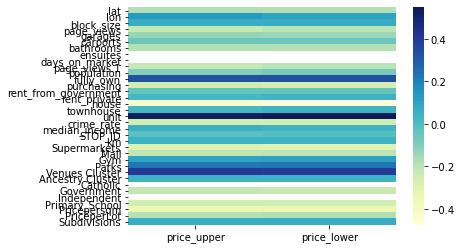

In [221]:
corr_init=first_filters_data.corr()[['price_upper','price_lower']][2:]
sns.heatmap(corr_init,cmap='YlGnBu',yticklabels=True)


### Correlation

In [48]:
property_data_merged=property_data_merged[[ 'price_lower','price_upper', 'price', 'address_street_full', 'lat',
       'lon', 'property_type', 'block_size', 'suburb', 'status',
       'page_views', 'garages', 'carports', 'bathrooms', 'ensuites',
       'days_on_market',  'page_views.1', 'median_age',
       'population', 'fully_own', 'purchasing', 'rent_from_government',
       'rent_private', 'house', 'townhouse', 'unit', 'street_name',
       'street_type', 'crime_rate', 'median_income', 'area_type',
       'STOP_ID', 'STOP_NAME', 'km', 'Supermarkets', 'Mall', 'Gym',
       'Parks', 'state_x', 'Venues Cluster', '#1', '#2', '#3', '#4', '#5',
       '#6', '#7', '#8', '#9', '#10', 'Ancestry Cluster',
       'Catholic', 'Government', 'Independent', 'Primary_School']]

In [49]:
correlation_initial = property_data_merged.corr()[['price_upper','price_lower']]

In [ ]:
test_data_set.corr()

In [50]:
correlation_initial=correlation_initial[2:]

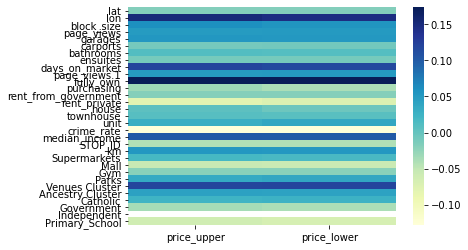

In [56]:
correlation_initial
sns.heatmap(correlation_initial,cmap='YlGnBu',yticklabels=True)
